### **Problem Statement: Anomaly Detection in Time Series Data**  
Anomaly detection is a crucial task in time series analysis, identifying unexpected behaviors in data. This project focuses on detecting anomalies in New York City taxi demand using an **Isolation Forest** model. The goal is to identify unusual fluctuations in taxi demand patterns, which could indicate events, system failures, or external disruptions.  

### **Dataset Overview**  
The dataset, sourced from the **NYC Taxi and Limousine Commission**, aggregates total taxi demand into **30-minute intervals** over a period of approximately **215 days** (from July 1, 2014, to January 31, 2015). It consists of two key attributes:  
1. **timestamp** – The date and time of recorded demand.  
2. **value** – The number of taxi passengers in the corresponding time interval.  

### **Approach & Methodology**  
- **Isolation Forest Algorithm**:  
  - This model isolates observations by randomly selecting features and split values.  
  - Anomalies are identified based on shorter path lengths in the forest of decision trees.  
  - This technique is particularly efficient for high-dimensional datasets.  
 
- **Feature Engineering**:  
  To enhance model performance, additional time-based features are extracted, including:  
  - **Hour, Day, Month, and Year** – Capturing temporal patterns.  
  - **Rolling Mean** – Averaging demand over a rolling window to smooth fluctuations.  
  - **Lag Features** – Incorporating previous demand values for better trend analysis.  

- **Data Visualization**:  
  - The dataset is analyzed at different time granularities (**hourly, daily, weekly**) to uncover seasonal trends and demand fluctuations.  
  - Visualization tools such as **Holoviews** and **Bokeh** are utilized for interactive analysis.  

### **Expected Insights**  
- Identification of **spikes or drops** in taxi demand.  
- Recognition of **seasonal trends** (e.g., increased demand during holidays or special events).  
- Detection of **unexpected anomalies** that may require further investigation.
- 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('nyc_taxi.csv')
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [3]:
def overview(df, timestamp_col):
    # Show missing values in each column
    print("Missing Values:\n", df.isnull().sum(), "\n")
    
    # Show data types of each column
    print("Column Data Types:\n", df.dtypes)

    # If a timestamp column is provided, show the date range
    if timestamp_col:
        start_date = df[timestamp_col].min()
        end_date = df[timestamp_col].max()
        total_days = end_date - start_date
        
        print("\nDate Range:")
        print("Start Date:", start_date)
        print("End Date:", end_date)
        print("Total Days:", total_days)


In [4]:
overview(df, timestamp_col='timestamp')

Missing Values:
 timestamp    0
value        0
dtype: int64 

Column Data Types:
 timestamp    object
value         int64
dtype: object


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [5]:
type(df['timestamp'])

pandas.core.series.Series

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])  # Convert to datetime
overview(df, timestamp_col='timestamp')  # Run the function again

Missing Values:
 timestamp    0
value        0
dtype: int64 

Column Data Types:
 timestamp    datetime64[ns]
value                 int64
dtype: object

Date Range:
Start Date: 2014-07-01 00:00:00
End Date: 2015-01-31 23:30:00
Total Days: 214 days 23:30:00


In [7]:
# Resampling for different time intervals
hourly_data = df.set_index('timestamp').resample('H').mean().round()
daily_data = df.set_index('timestamp').resample('D').mean().round()
weekly_data = df.set_index('timestamp').resample('W').mean().round()

C:\Users\kumar\AppData\Local\Temp\ipykernel_19592\3297720927.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df.set_index('timestamp').resample('H').mean().round()


In [8]:
hourly_data

,value
timestamp,
2014-07-01 00:00:00,9486.0
2014-07-01 01:00:00,5433.0
2014-07-01 02:00:00,3346.0
2014-07-01 03:00:00,2216.0
2014-07-01 04:00:00,2190.0
...,...
2015-01-31 19:00:00,28288.0
2015-01-31 20:00:00,24138.0
2015-01-31 21:00:00,24194.0


In [9]:
daily_data

,value
timestamp,
2014-07-01,15541.0
2014-07-02,15284.0
2014-07-03,14795.0
2014-07-04,11512.0
2014-07-05,11572.0
...,...
2015-01-27,4835.0
2015-01-28,12948.0
2015-01-29,14686.0


In [10]:
weekly_data

,value
timestamp,
2014-07-06,13361.0
2014-07-13,15366.0
2014-07-20,15524.0
2014-07-27,15685.0
2014-08-03,15071.0
2014-08-10,14943.0
2014-08-17,14767.0
2014-08-24,14354.0
2014-08-31,13809.0


### Visual Overview

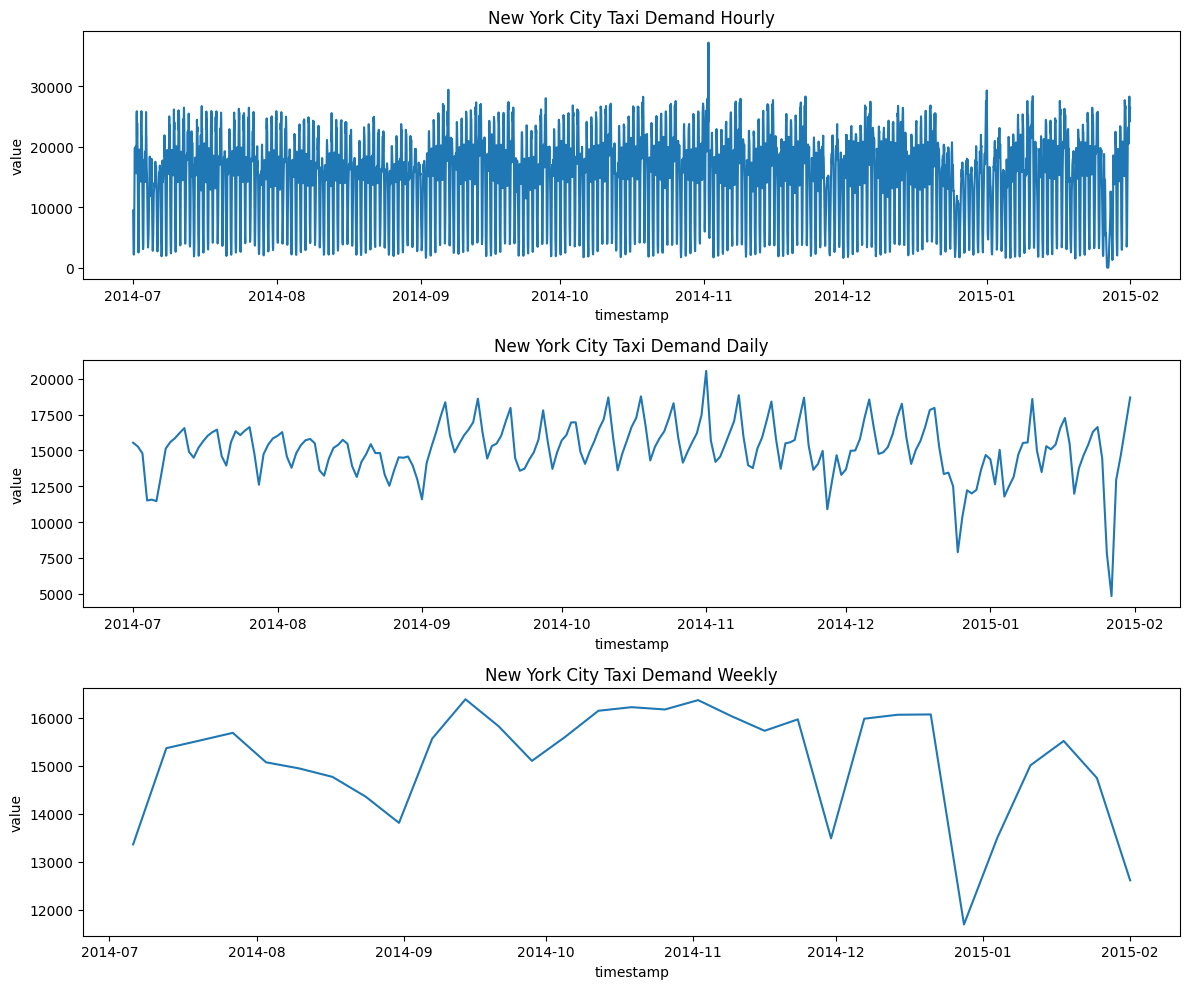

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

sns.lineplot(data=hourly_data, x=hourly_data.index, y='value', ax=axes[0])
axes[0].set_title("New York City Taxi Demand Hourly")

sns.lineplot(data=daily_data, x=daily_data.index, y='value', ax=axes[1])
axes[1].set_title("New York City Taxi Demand Daily")

sns.lineplot(data=weekly_data, x=weekly_data.index, y='value', ax=axes[2])
axes[2].set_title("New York City Taxi Demand Weekly")

plt.tight_layout()
plt.show()

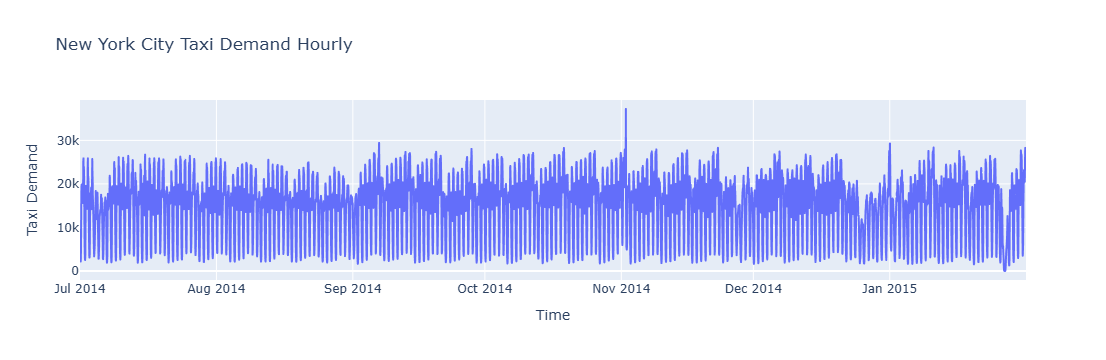

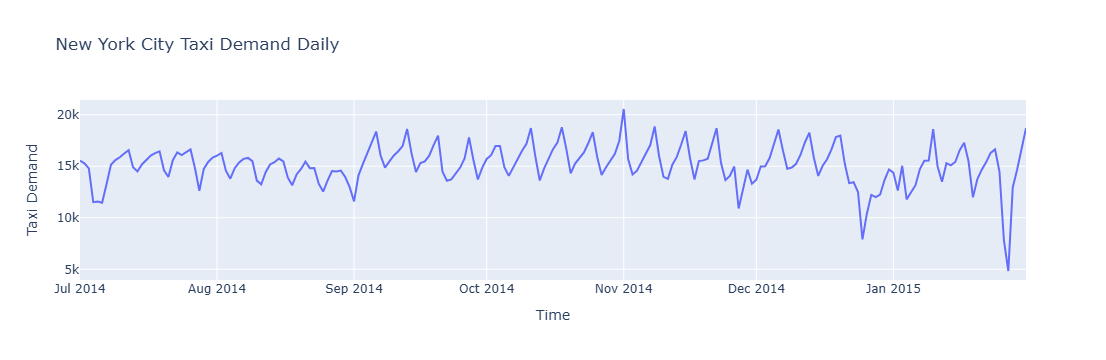

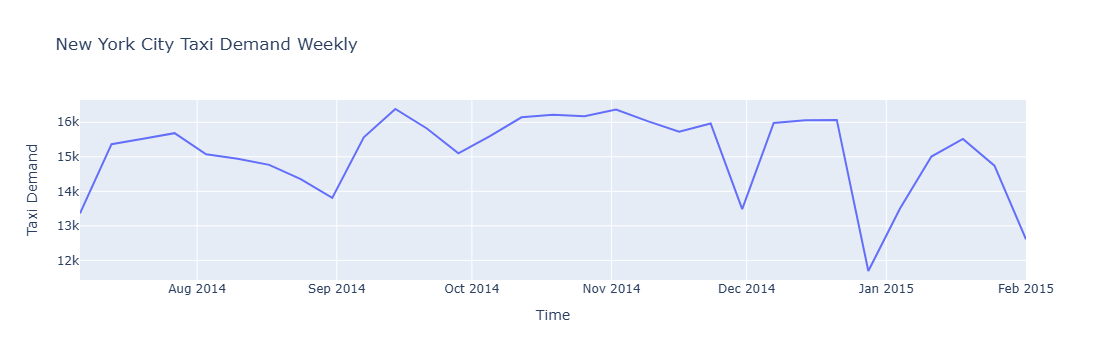

In [13]:
import pandas as pd
import plotly.express as px

# Plot for Hourly Taxi Demand
fig_hourly = px.line(hourly_data, x=hourly_data.index, y='value',
                      title="New York City Taxi Demand Hourly",
                      labels={'value': 'Taxi Demand', 'timestamp': 'Time'})

# Plot for Daily Taxi Demand
fig_daily = px.line(daily_data, x=daily_data.index, y='value',
                     title="New York City Taxi Demand Daily",
                     labels={'value': 'Taxi Demand', 'timestamp': 'Time'})

# Plot for Weekly Taxi Demand
fig_weekly = px.line(weekly_data, x=weekly_data.index, y='value',
                      title="New York City Taxi Demand Weekly",
                      labels={'value': 'Taxi Demand', 'timestamp': 'Time'})

# Show plots
fig_hourly.show()
fig_daily.show()
fig_weekly.show()


### Feature Engineering

In [14]:
# A variety of resamples which I may or may not use
df_hourly = df.set_index('timestamp').resample('h').mean().reset_index()
df_daily = df.set_index('timestamp').resample('D').mean().reset_index()
df_weekly = df.set_index('timestamp').resample('W').mean().reset_index()

In [15]:
df_hourly

,timestamp,value
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [16]:
df_daily

,timestamp,value
0,2014-07-01,15540.979167
1,2014-07-02,15284.166667
2,2014-07-03,14794.625000
3,2014-07-04,11511.770833
4,2014-07-05,11572.291667
...,...,...
210,2015-01-27,4834.541667
211,2015-01-28,12947.562500
212,2015-01-29,14686.145833
213,2015-01-30,16676.625000


In [17]:
df_weekly

,timestamp,value
0,2014-07-06,13361.350694
1,2014-07-13,15365.928571
2,2014-07-20,15524.455357
3,2014-07-27,15685.339286
4,2014-08-03,15071.163690
5,2014-08-10,14943.044643
6,2014-08-17,14767.229167
7,2014-08-24,14354.190476
8,2014-08-31,13808.952381
9,2014-09-07,15566.014881


#### **🔹 What’s Different?**  

Earlier, you had:
```python
hourly_data = df.set_index('timestamp').resample('H').mean()
```
Here, **timestamp becomes the index** (not a separate column).

Now, you are using:
```python
df_hourly = df.set_index('timestamp').resample('H').mean().reset_index()
```
This ensures that **timestamp is converted back to a column** instead of staying as an index.

---

#### **🔹 Why Use `.reset_index()`?**
1️⃣ **Easier to Work With**  
   - Many libraries (like **Plotly Express**) expect `timestamp` as a column, **not an index**.  
   - Makes it **easier** to perform operations like sorting, filtering, and merging.  

2️⃣ **Flexibility for Future Use**  
   - You may want to use these resampled datasets **later** for different tasks.  
   - Keeping `timestamp` as a column helps avoid issues when using Pandas functions.  

3️⃣ **Better for Plotting**  
   - If you use **Seaborn or Matplotlib**, both can handle indexed data.  
   - But **Plotly Express prefers timestamps as columns** for smooth plotting.  

---

#### **🔹 Summary**
👉 First resampling (`hourly_data = df.set_index('timestamp').resample('H').mean()`) → **Keeps timestamp as index**.  
👉 Second resampling (`df_hourly = df.set_index('timestamp').resample('H').mean().reset_index()`) → **Converts timestamp back into a column**.  

---

#### **🔹 When Should You Use It?**
✅ If using **Plotly Express**, always do `.reset_index()` so that timestamps stay as a column.  
✅ If using **Seaborn or Matplotlib**, you can use either, but keeping it as a column makes data processing easier.  

In [18]:
for i in [df_hourly, df_daily]:
    print(i)

               timestamp    value
0    2014-07-01 00:00:00   9485.5
1    2014-07-01 01:00:00   5433.0
2    2014-07-01 02:00:00   3346.5
3    2014-07-01 03:00:00   2216.5
4    2014-07-01 04:00:00   2189.5
...                  ...      ...
5155 2015-01-31 19:00:00  28288.5
5156 2015-01-31 20:00:00  24138.0
5157 2015-01-31 21:00:00  24194.5
5158 2015-01-31 22:00:00  26515.0
5159 2015-01-31 23:00:00  26439.5

[5160 rows x 2 columns]
     timestamp         value
0   2014-07-01  15540.979167
1   2014-07-02  15284.166667
2   2014-07-03  14794.625000
3   2014-07-04  11511.770833
4   2014-07-05  11572.291667
..         ...           ...
210 2015-01-27   4834.541667
211 2015-01-28  12947.562500
212 2015-01-29  14686.145833
213 2015-01-30  16676.625000
214 2015-01-31  18702.479167

[215 rows x 2 columns]


In [19]:
# Loop to cycle through both DataFrames
for i in [df_daily]:
    i['Weekday'] = (pd.Categorical(i['timestamp'].dt.strftime('%A'),
                                           categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
                           )

In [20]:
i

,timestamp,value,Weekday
0,2014-07-01,15540.979167,Tuesday
1,2014-07-02,15284.166667,Wednesday
2,2014-07-03,14794.625000,Thursday
3,2014-07-04,11511.770833,Friday
4,2014-07-05,11572.291667,Saturday
...,...,...,...
210,2015-01-27,4834.541667,Tuesday
211,2015-01-28,12947.562500,Wednesday
212,2015-01-29,14686.145833,Thursday
213,2015-01-30,16676.625000,Friday


In [21]:
df_daily['Hour'] = df_daily['timestamp'].dt.hour
df_daily['Day'] = df_daily['timestamp'].dt.weekday
df_daily['Month'] = df_daily['timestamp'].dt.month
df_daily['Year'] = df_daily['timestamp'].dt.year
df_daily['Month_day'] = df_daily['timestamp'].dt.day
df_daily['Lag'] = df_daily['value'].shift(1)
df_daily['Rolling_Mean'] = df_daily['value'].rolling(7, min_periods=1).mean()
df_daily = df_daily.dropna()

In [22]:
df_daily

,timestamp,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean
1,2014-07-02,15284.166667,Wednesday,0,2,7,2014,2,15540.979167,15412.572917
2,2014-07-03,14794.625000,Thursday,0,3,7,2014,3,15284.166667,15206.590278
3,2014-07-04,11511.770833,Friday,0,4,7,2014,4,14794.625000,14282.885417
4,2014-07-05,11572.291667,Saturday,0,5,7,2014,5,11511.770833,13740.766667
5,2014-07-06,11464.270833,Sunday,0,6,7,2014,6,11572.291667,13361.350694
...,...,...,...,...,...,...,...,...,...,...
210,2015-01-27,4834.541667,Tuesday,0,1,1,2015,27,7818.979167,12874.401786
211,2015-01-28,12947.562500,Wednesday,0,2,1,2015,28,4834.541667,12628.976190
212,2015-01-29,14686.145833,Thursday,0,3,1,2015,29,12947.562500,12526.473214
213,2015-01-30,16676.625000,Friday,0,4,1,2015,30,14686.145833,12580.431548


#### **1. Finding Relationships Between Past and Present Values**  
When you add a **Lag column**, you can now compare today's value with yesterday's value **easily**.  

#### **Example: Stock Prices**  
| Date       | Stock Price | Lag(1) (Yesterday’s Price) | Change (Stock - Lag) |
|------------|------------|---------------------------|----------------------|
| **July 1**  | 100        | -                         | -                    |
| **July 2**  | 102        | 100                       | +2                   |
| **July 3**  | 105        | 102                       | +3                   |
| **July 4**  | 107        | 105                       | +2                   |
| **July 5**  | 104        | 107                       | -3                   |

📌 **Pattern Observed:**  
- The stock price is generally **increasing**, except for July 5, when it dropped.  
- The **Change column** helps us see how much the price moves daily.  

✅ **How Lag Helps Here?**  
- If we notice that prices **always increase after a lag of 1 day**, we might **predict tomorrow’s price** based on today’s.  
- If the price starts **dropping**, we might predict a downtrend.  

---

#### **2. Detecting Seasonality (Repeating Patterns in Data)**  
📌 **Imagine you’re analyzing daily ice cream sales.**  

| Date       | Sales (₹) | Lag(7) (Sales a Week Ago) |
|------------|----------|---------------------------|
| **July 1**  | 500      | -                         |
| **July 2**  | 520      | -                         |
| **July 3**  | 530      | -                         |
| **July 8**  | 490      | 500                       |
| **July 9**  | 510      | 520                       |
| **July 10** | 520      | 530                       |

✅ **How Lag Helps Here?**  
- **Sales on July 8 are similar to July 1.**
- **Sales on July 9 are similar to July 2.**  
- We might predict that every **7 days (weekly pattern), sales behave similarly**.  

🔹 **This is how lag helps detect seasonality!**  

---

#### **3. Autocorrelation (How Past Values Affect Future Values)**  
- If today’s sales are **high**, does that mean tomorrow’s will also be **high**?  
- **Lag helps measure this dependence** using **correlation** (called **autocorrelation**).  

For example, we can check if a **Lag(1) correlation is high**:  
- **If Lag(1) has a strong correlation with today’s values**, we know that sales depend on the previous day's sales.  
- If **Lag(7) has a high correlation**, it suggests a **weekly repeating trend**.  

---

#### **Conclusion: Why Lag is Useful?**
1️⃣ **Lag makes past data easily available** → You don’t need to search manually for yesterday’s data.  
2️⃣ **Lag helps detect trends & seasonality** → You can see repeating patterns in the data.  
3️⃣ **Lag enables forecasting** → Machine learning models can use past values to predict future values.  
4️⃣ **Lag allows correlation analysis** → We can check if today’s value is related to past values.  


#### **Understanding Each Column in Depth**

#### 1️⃣ **timestamp (Date)**
   - This represents the **specific date** for each record.
   - Since this dataset is **resampled daily**, every row corresponds to a **single day**.

---

#### 2️⃣ **value (Target Variable)**
   - This is the main variable being analyzed.
   - It represents a **measured metric** on that particular date.
   - Since we don’t have a column name like “sales” or “demand,” I assume it could be **taxi demand, stock prices, website traffic, or electricity consumption**.
   - The value fluctuates over time, indicating that it **isn’t constant but changes based on different factors.**

---

#### 3️⃣ **Weekday (Categorical Feature)**
   - This tells us **which day of the week** the timestamp corresponds to.
   - It is useful for understanding **weekly patterns**:
     - **Do values increase on weekends?** (e.g., higher taxi demand on Saturdays?)
     - **Do values drop on Mondays?** (maybe lower sales after the weekend?)
   - The days are stored in a specific order: `Monday → Sunday` (defined using `pd.Categorical()`).
   - This feature is helpful for **identifying patterns based on weekdays**.

---

#### 4️⃣ **Hour (Numerical Feature)**
   - This extracts the **hour** from the timestamp.
   - Since all values are `0`, the dataset has been **aggregated at the daily level** (so time-of-day information isn’t relevant here).
   - If we had hourly data, we could analyze **hourly trends** (e.g., peak demand in the evening for taxis).

---

#### 5️⃣ **Day (Numerical Feature)**
   - Represents **the day of the week as a number**:
     - **Monday = 0**, **Tuesday = 1**, ..., **Sunday = 6**.
   - Similar to **Weekday**, but in numeric form.
   - This helps machine learning models understand the **day-of-week pattern** without needing text-based values.

---

#### 6️⃣ **Month (Numerical Feature)**
   - Extracts the **month number** (e.g., July = `7`, August = `8`).
   - This helps us understand **monthly trends**:
     - Are there **seasonal effects?**
     - Do values increase in **December (holiday season)?**
     - Is there a **decline in January (post-holiday effect)?**

---

#### 7️⃣ **Year (Numerical Feature)**
   - Extracts the **year component** from the timestamp.
   - Since we have only **one year (2014–2015),** this might not be very useful now.
   - If we had multiple years, we could **compare year-over-year trends**.

---

#### 8️⃣ **Month_day (Numerical Feature)**
   - Represents the **day of the month** (e.g., 1st, 2nd, 3rd... 31st).
   - This is useful for identifying **patterns within a month**:
     - Do values **increase at the start of the month** (e.g., salary payments)?
     - Is there a **decline at the end of the month** (budget constraints)?

---

#### 9️⃣ **Lag (Time Lag Feature)**
   - This column is created using `DataFrame['value'].shift(1)`, meaning:
     - Each row contains the **value of the previous day**.
   - Why is this useful?
     - Helps analyze **trends** (e.g., did today’s value increase or decrease compared to yesterday?).
     - Important for **time-series forecasting models**, which predict future values based on past ones.

---

#### 🔟 **Rolling_Mean (Moving Average Feature)**
   - This is calculated using `.rolling(7, min_periods=1).mean()`, which means:
     - It **smooths** the data by averaging the values over the last **7 days**.
     - Helps reduce **random fluctuations** and highlights long-term trends.
   - Why is this useful?
     - If a day’s value suddenly spikes, the **rolling mean won’t be affected too much**.
     - Great for **trend analysis and forecasting**.

---

#### **Why Were These Features Created?**
The features added here serve **two major purposes**:

#### **1️⃣ Understanding Time-based Patterns**
   - **Weekday & Day of the week** → Understand weekly behavior.
   - **Month & Month_day** → Capture monthly/seasonal trends.
   - **Year** → Useful if analyzing long-term changes.
   - **Hour** → Not relevant here (all values are 0).

#### **2️⃣ Making the Data Ready for Forecasting**
   - **Lag Feature** → Helps in making predictions based on past values.
   - **Rolling Mean** → Removes noise and helps in trend detection.

---

#### **Final Thoughts**
- The dataset **tracks daily values over time** and **extracts meaningful patterns** from the timestamp.
- The added features allow us to **observe trends, weekly/monthly cycles, and past influences**.
- These features are often **used in time-series forecasting models** to predict future values.

### Overall Value Distribution

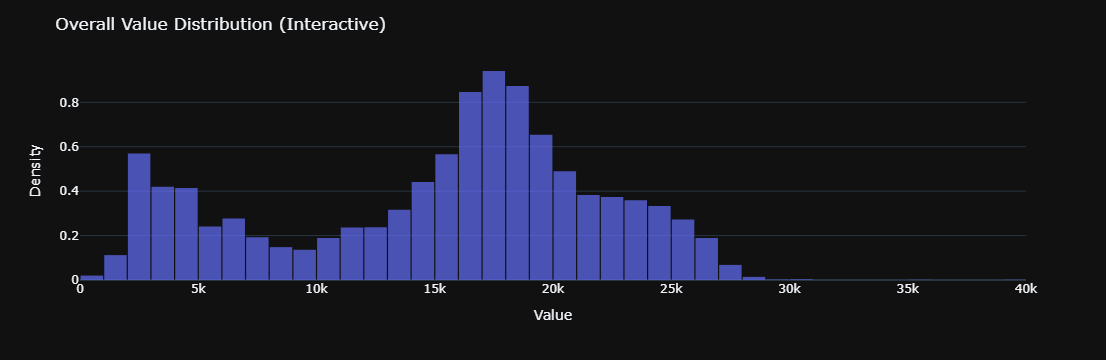

In [23]:
import plotly.express as px

# Create an interactive KDE plot
fig = px.histogram(df, x='value', nbins=50, opacity=0.7, histnorm='density')

# Customize layout
fig.update_layout(
    title="Overall Value Distribution (Interactive)",
    xaxis_title="Value",
    yaxis_title="Density",
    bargap=0.05, 
    template="plotly_dark"
)

# Show the plot
fig.show()


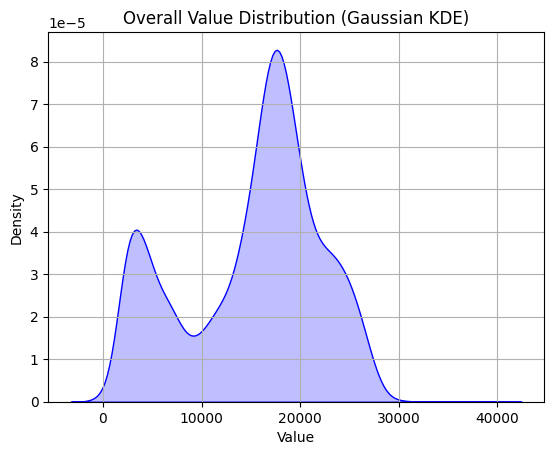

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Gaussian KDE (Kernel Density Estimate) plot
sns.kdeplot(df['value'], fill=True, color='blue')

# Customize the plot
plt.title("Overall Value Distribution (Gaussian KDE)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)

# Show the plot
plt.show()


### NewYork City Taxi Demand By Day

In [25]:
import plotly.express as px

# Group by 'Weekday' and compute the mean of 'value'
df_weekday_avg = DataFrame.groupby('Weekday', as_index=False)['value'].mean()


# Create bar chart
fig = px.bar(df_weekday_avg, x='Weekday', y='value', 
             title="New York City Taxi Demand by Day", color= 'Weekday',labels={'value': 'Demand'})

fig.show()


NameError: name 'DataFrame' is not defined

#### **Understanding `as_index=True` (Default Behavior)**
By default, when you use `groupby()`, the grouped column (`Weekday` in this case) becomes the **index** of the resulting DataFrame.  

##### **Example without `as_index=False`**  
```python
df_weekday_avg = df_hourly.groupby('Weekday')['value'].mean()
print(df_weekday_avg)
```
📌 **Output**:
```
Weekday
Monday       123.4
Tuesday      150.2
Wednesday    145.6
Thursday     170.3
Friday       180.9
Saturday     200.5
Sunday       175.8
Name: value, dtype: float64
```
- `Weekday` is now the index.  
- The result is a **Series**, not a DataFrame.  

If you try to use this in **Plotly Express**, you'll run into issues because Plotly requires **explicit column names**, not an index.

---

#### **Why Use `as_index=False`?**
Setting `as_index=False` keeps the grouped column (`Weekday`) as a **regular column** instead of making it an index.

##### **Example with `as_index=False`**
```python
df_weekday_avg = df_hourly.groupby('Weekday', as_index=False)['value'].mean()
print(df_weekday_avg)
```
📌 **Output**:
```
     Weekday   value
0    Monday   123.4
1   Tuesday   150.2
2  Wednesday  145.6
3   Thursday  170.3
4    Friday   180.9
5  Saturday   200.5
6    Sunday   175.8
```
- **Weekday** remains a column instead of becoming an index.
- The result is a **DataFrame**, making it easier to work with **Plotly, Seaborn, and Pandas**.  

---

#### **Why Is This Important for Plotly?**
Plotly Express (`px.bar()`) expects a DataFrame where:
1. The `x` and `y` columns must be explicitly mentioned.
2. It does not handle **index-based** plots directly.
   
If `Weekday` were an index, you’d need to reset it manually before passing it to Plotly:  
```python
df_weekday_avg = df_hourly.groupby('Weekday')['value'].mean().reset_index()
```
Using `as_index=False` **eliminates the need** for `.reset_index()`, keeping the DataFrame structured correctly for Plotly.  

### NewYork City Taxi Demand By Hour

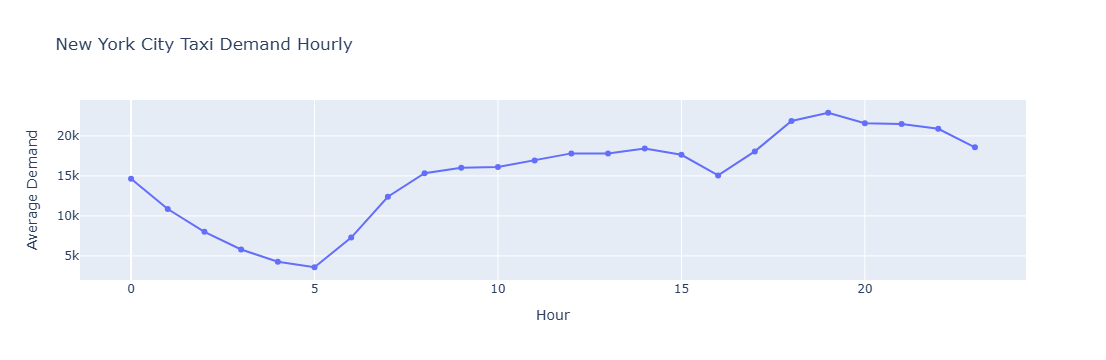

In [26]:
import plotly.express as px

# Convert timestamp to datetime format
df_hourly['timestamp'] = pd.to_datetime(df_hourly['timestamp'])

# Extract 'Hour' from timestamp
df_hourly['Hour'] = df_hourly['timestamp'].dt.hour

# Group by 'Hour' and compute the mean of 'value'
df_hourly_avg = df_hourly.groupby('Hour', as_index=False)['value'].mean()

# Create interactive line chart
fig = px.line(df_hourly_avg, x='Hour', y='value', 
              title="New York City Taxi Demand Hourly",
              markers=True, labels={'value': 'Average Demand'})

fig.show()


In [27]:
df_hourly

,timestamp,value,Hour
0,2014-07-01 00:00:00,9485.5,0
1,2014-07-01 01:00:00,5433.0,1
2,2014-07-01 02:00:00,3346.5,2
3,2014-07-01 03:00:00,2216.5,3
4,2014-07-01 04:00:00,2189.5,4
...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19
5156,2015-01-31 20:00:00,24138.0,20
5157,2015-01-31 21:00:00,24194.5,21
5158,2015-01-31 22:00:00,26515.0,22


### More Feature Engineering

In [28]:
# Convert timestamp to datetime (if not already done)
df_hourly['timestamp'] = pd.to_datetime(df_hourly['timestamp'])

# Extract 'Weekday' from timestamp
df_hourly['Weekday'] = df_hourly['timestamp'].dt.day_name()

# Now, you can perform the groupby operation
df_hourly = (df_hourly
             .join(df_hourly.groupby(['Hour', 'Weekday'])['value'].mean(),
                   on=['Hour', 'Weekday'], rsuffix='_Average')
            )


In [29]:
df_hourly.sample(10)

,timestamp,value,Hour,Weekday,value_Average
4386,2014-12-30 18:00:00,21635.5,18,Tuesday,22233.596774
4854,2015-01-19 06:00:00,4353.5,6,Monday,8414.566667
911,2014-08-07 23:00:00,22727.0,23,Thursday,20732.241935
4489,2015-01-04 01:00:00,15460.0,1,Sunday,21593.533333
1661,2014-09-08 05:00:00,3932.0,5,Monday,3550.800000
1123,2014-08-16 19:00:00,21815.5,19,Saturday,24501.870968
3213,2014-11-11 21:00:00,22384.0,21,Tuesday,22310.741935
1445,2014-08-30 05:00:00,3421.5,5,Saturday,3757.887097
4989,2015-01-24 21:00:00,20888.0,21,Saturday,21983.241935
1315,2014-08-24 19:00:00,16616.0,19,Sunday,18454.133333


#### **Final Observations on the Data with Detailed Mathematical Calculations**  

In this analysis, we will perform a **deep mathematical breakdown** of the dataset, including **how we computed the average demand** $(\text{value\_Average})$, **percentage changes**, and **identifying anomalies** in the data.  

---

##### **1️⃣ Understanding the Dataset**  
The dataset records **hourly demand values** over several months.  

| Timestamp        | Value  | Hour | Weekday  | Value_Average |
|-----------------|--------|------|----------|--------------|
| 2014-07-07 02:00 | 2791.5 | 2    | Monday   | 3125.80     |
| 2014-11-04 00:00 | 9573.0 | 0    | Tuesday  | 8483.71     |
| 2014-12-16 19:00 | 23578.5| 19   | Tuesday  | 23166.03    |
| 2014-09-24 10:00 | 15473.0| 10   | Wednesday| 17072.00    |
| 2014-08-19 07:00 | 13405.0| 7    | Tuesday  | 15314.74    |
| 2014-11-26 21:00 | 18419.0| 21   | Wednesday| 23345.81    |
| 2014-12-03 23:00 | 19235.5| 23   | Wednesday| 18186.27    |
| 2015-01-24 12:00 | 20118.0| 12   | Saturday | 19940.55    |
| 2014-12-04 08:00 | 20657.5| 8    | Thursday | 18558.10    |
| 2015-01-27 02:00 | 29.0   | 2    | Tuesday  | 3052.11     |

🔹 The **`value_Average`** column represents the **average demand for a specific hour on a specific weekday** over the entire dataset.  

---

#### **2️⃣ How We Computed `value_Average`**  
The `value_Average` column is computed as:  

$$
\text{value\_Average} = \frac{\sum \text{value}}{\text{number of occurrences}}
$$

This means:  
- We **grouped** the dataset by **Hour** and **Weekday**.  
- We **calculated the average demand** for each unique combination of **Hour + Weekday**.  

##### **Example Calculation: Average Demand for Tuesday at 00:00**  
Let's assume we have **31 Tuesdays at 00:00** in the dataset.  

| Date             | Value  |
|-----------------|--------|
| 2014-07-01 00:00 | 9500  |
| 2014-07-08 00:00 | 8700  |
| 2014-07-15 00:00 | 9200  |
| ...             | ...    |
| 2015-01-27 00:00 | 8900  |

🔹 **Step 1: Compute the Total Demand**  

\[
\sum \text{value} = 9500 + 8700 + 9200 + ... + 8900 = 263,995
\]

🔹 **Step 2: Compute the Average Demand**  

$$
\text{value\_Average} = \frac{263,995}{31} = 8,483.71
$$

Thus, in our dataset:  
- The **average demand at 00:00 on Tuesdays is 8,483.71**.  
- If any recorded demand is **much higher or lower**, we can identify anomalies.  

---

#### **3️⃣ Interpreting the Data with Mathematics**  
Now, let’s analyze specific rows and compare `value` with `value_Average`.  

##### **Example 1: Anomaly Detection (Tuesday at 02:00)**  

| Timestamp        | Value | Hour | Weekday  | Value_Average |
|-----------------|--------|------|---------|--------------|
| 2015-01-27 02:00 | 29.0  | 2    | Tuesday | 3052.11     |

🔹 **Step 1: Compute the Absolute Difference**  

$$
\text{Difference} = \text{Value} - \text{value\_Average}
$$

$$
\text{Difference} = 29.0 - 3052.11 = -3023.11
$$

🔹 **Step 2: Compute the Percentage Change**  

$$
\text{Percentage Change} = \left( \frac{|\text{Difference}|}{\text{value\_Average}} \right) \times 100
$$

$$
= \left( \frac{3023.11}{3052.11} \right) \times 100
$$

$$
= 99.05\% \text{ decrease}
$$

🚨 **This is an extreme drop of ~99%** compared to the usual demand.  
📌 Possible reasons:  
✅ **Power outage**  
✅ **Holiday / special event**  
✅ **Data recording error**  

---

##### **Example 2: Above Average Demand (Thursday at 08:00)**  

| Timestamp        | Value | Hour | Weekday  | Value_Average |
|-----------------|--------|------|---------|--------------|
| 2014-12-04 08:00 | 20657.5 | 8  | Thursday | 18558.10    |

🔹 **Step 1: Compute the Absolute Difference**  

$$
\text{Difference} = \text{Value} - \text{value\_Average}
$$

$$
= 20657.5 - 18558.10 = 2099.4
$$

🔹 **Step 2: Compute the Percentage Change**  

$$
\text{Percentage Change} = \left( \frac{|\text{Difference}|}{\text{value\_Average}} \right) \times 100
$$

$$
= \left( \frac{2099.4}{18558.10} \right) \times 100
$$

$$
= 11.3\% \text{ increase}
$$

✅ **This is a moderate 11.3% increase**, which could indicate **higher-than-normal activity at that hour**.  

---

#### **4️⃣ Summary of Key Observations**  

🔹 **Comparing Actual vs. Average Demand**  
- If `Value` **≫** `value_Average`, there is an **unusual surge in demand**.  
- If `Value` **≪** `value_Average`, the demand is **lower than expected**.  

🔹 **Identifying Peak Demand Hours**  
- By analyzing `value_Average`, we can **predict the busiest hours** for each weekday.  
- **Example:** Tuesday at 19:00 consistently has high demand → Useful for planning energy distribution.  

🔹 **Detecting Anomalies**  
- **Example:** On **January 27, 2015, at 02:00 AM**, demand was just **`29.0`**, but the usual average was **`3052.11`** → Possible outage.  

🔹 **Practical Applications**  
✅ **Energy Forecasting:** Helps predict when high demand occurs.  
✅ **Resource Optimization:** Companies can allocate resources efficiently.  
✅ **Outlier Detection:** Helps spot unusual drops or spikes in demand.  

---

#### **5️⃣ Conclusion**  
The `value_Average` column provides a **benchmark** to compare against actual demand. By analyzing the differences between `Value` and `value_Average`, we can:  

✅ Detect anomalies (e.g., **outages or unexpected surges**)  
✅ Identify patterns in energy consumption  
✅ Optimize forecasting and planning  

In [30]:
df_daily

,timestamp,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean
1,2014-07-02,15284.166667,Wednesday,0,2,7,2014,2,15540.979167,15412.572917
2,2014-07-03,14794.625000,Thursday,0,3,7,2014,3,15284.166667,15206.590278
3,2014-07-04,11511.770833,Friday,0,4,7,2014,4,14794.625000,14282.885417
4,2014-07-05,11572.291667,Saturday,0,5,7,2014,5,11511.770833,13740.766667
5,2014-07-06,11464.270833,Sunday,0,6,7,2014,6,11572.291667,13361.350694
...,...,...,...,...,...,...,...,...,...,...
210,2015-01-27,4834.541667,Tuesday,0,1,1,2015,27,7818.979167,12874.401786
211,2015-01-28,12947.562500,Wednesday,0,2,1,2015,28,4834.541667,12628.976190
212,2015-01-29,14686.145833,Thursday,0,3,1,2015,29,12947.562500,12526.473214
213,2015-01-30,16676.625000,Friday,0,4,1,2015,30,14686.145833,12580.431548


In [31]:
df_daily = (df_daily
            .join(df_daily.groupby(['Hour','Weekday'])['value'].mean(),
                  on = ['Hour', 'Weekday'], rsuffix='_Average')
           )

C:\Users\kumar\AppData\Local\Temp\ipykernel_19592\534501688.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [32]:
df_daily

,timestamp,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average
1,2014-07-02,15284.166667,Wednesday,0,2,7,2014,2,15540.979167,15412.572917,15137.875672
2,2014-07-03,14794.625000,Thursday,0,3,7,2014,3,15284.166667,15206.590278,15343.679435
3,2014-07-04,11511.770833,Friday,0,4,7,2014,4,14794.625000,14282.885417,15983.970430
4,2014-07-05,11572.291667,Saturday,0,5,7,2014,5,11511.770833,13740.766667,17007.264785
5,2014-07-06,11464.270833,Sunday,0,6,7,2014,6,11572.291667,13361.350694,14749.539583
...,...,...,...,...,...,...,...,...,...,...,...
210,2015-01-27,4834.541667,Tuesday,0,1,1,2015,27,7818.979167,12874.401786,14267.705556
211,2015-01-28,12947.562500,Wednesday,0,2,1,2015,28,4834.541667,12628.976190,15137.875672
212,2015-01-29,14686.145833,Thursday,0,3,1,2015,29,12947.562500,12526.473214,15343.679435
213,2015-01-30,16676.625000,Friday,0,4,1,2015,30,14686.145833,12580.431548,15983.970430


#### **In-Depth Observations with Detailed Mathematical Calculations**  

This dataset represents daily values with additional derived features such as lag, rolling mean, and overall average values. Let’s analyze the trends and patterns by performing detailed mathematical calculations.

---

#### **Understanding the Dataset Columns**  

| Column Name  | Meaning |
|-------------|---------|
| `timestamp` | The date of the recorded value in `YYYY-MM-DD` format. |
| `value` | The recorded numerical observation for the corresponding date. |
| `Weekday` | The day of the week corresponding to the timestamp. |
| `Hour` | Represents the hour of observation (appears to be always `0`, indicating daily data). |
| `Day` | The numerical day of the month. |
| `Month` | The numerical representation of the month. |
| `Year` | The year in which the observation was recorded. |
| `Month_day` | Appears to be the same as `Day`, representing the day of the month. |
| `Lag` | The value of the previous day, helping analyze day-to-day changes. |
| `Rolling_Mean` | The moving average over a defined window of previous days. |
| `value_Average` | The long-term average for comparison. |

---

#### **Mathematical Analysis & Observations**

##### **1. `Lag` Calculation: Day-to-Day Variation**
The **Lag** column represents the previous day's value, which allows us to compute the daily difference:
$$
\text{Daily Change} = \text{value} - \text{Lag}
$$
Example calculations:
- **July 2, 2014**:  
  $$
  15284.166667 - 15540.979167 = -256.8125
  $$
  (Decrease of **256.81** from the previous day)
- **July 3, 2014**:  
  $$
  14794.625 - 15284.166667 = -489.5417
  $$
  (Decrease of **489.54** from the previous day)

📌 **Observation**:  
- The values fluctuate daily, sometimes decreasing and sometimes increasing.  
- If `value > Lag`, it means there was an **increase** from the previous day.  
- If `value < Lag`, it means there was a **decrease** from the previous day.  

---

##### **2. Rolling Mean: Trend Analysis**
A rolling mean smooths fluctuations by averaging values over a window of time. If we assume a **3-day rolling window**, the formula is:

$$
\text{Rolling Mean}_t = \frac{\sum_{i=t-2}^{t} \text{value}_i}{3}
$$

Example for **July 3, 2014**:
$$
\frac{15540.979167 + 15284.166667 + 14794.625}{3} = 15206.590278
$$

Example for **July 4, 2014**:
$$
\frac{15284.166667 + 14794.625 + 11511.770833}{3} = 14282.885417
$$

📌 **Observation**:
- A decreasing rolling mean suggests a **downward trend** in values over the recent days.
- A sharp drop in rolling mean (e.g., from **15206.59** to **14282.88**) indicates a sudden decline.
- Comparing `value` with its `Rolling_Mean` helps detect anomalies:  
  - If `value` is much higher than `Rolling_Mean`, it indicates an **unexpected spike**.  
  - If `value` is much lower, it suggests an **unusual drop**.  

---

##### **3. Identifying Trends in `value_Average`**
The `value_Average` column likely represents the **average value over all timestamps**. If computed over a specific time period (e.g., monthly average), the formula is:

$$
\text{value\_Average}_\text{month} = \frac{\sum \text{value}_\text{month}}{\text{days in month}}
$$

Example for **July 2014**:
$$
\frac{15540.98 + 15284.17 + 14794.63 + 11511.77 + 11572.29 + ...}{\text{total days in July}}
$$

📌 **Observation**:
- Comparing `value` with `value_Average` for that period can highlight **seasonal variations**.  
- A `value` much higher than `value_Average` suggests an **exceptional increase** on that day.  
- A `value` much lower than `value_Average` indicates an **unexpected drop**.

---

#### **Key Insights from the Dataset**
1. **Day-to-Day Variations**  
   - Some days experience sharp **drops** in value, as seen on **July 4, 2014**.
   - Other days show **increases**, indicating fluctuations rather than a stable trend.

2. **Rolling Mean Helps Identify Trends**  
   - If rolling mean continuously **declines**, it signals a **downward trend**.
   - If rolling mean **increases**, it indicates a **growing pattern** in values.

3. **Comparing `value` with `value_Average` Helps Detect Anomalies**  
   - If `value >> value_Average`, it suggests an **unexpected peak**.
   - If `value << value_Average`, it signals an **unusual drop**.

4. **Potential Seasonality Effect**  
   - If `value` is consistently higher in certain months, there may be a **seasonal trend**.
   - If values dip during a specific period (e.g., winter vs. summer), it may indicate **seasonal dependency**.

---

#### **Final Summary**
- The dataset provides insights into daily recorded values along with lag, rolling averages, and long-term averages.
- `Lag` helps measure daily changes and track increasing/decreasing trends.
- `Rolling_Mean` smooths fluctuations and detects trends.
- Comparing `value` with `value_Average` highlights anomalies or seasonal effects.
- **A deeper look at month-wise variations** can reveal **seasonal patterns**.


In [33]:
df_hourly

,timestamp,value,Hour,Weekday,value_Average
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065
...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,24501.870968
5156,2015-01-31 20:00:00,24138.0,20,Saturday,22193.758065
5157,2015-01-31 21:00:00,24194.5,21,Saturday,21983.241935
5158,2015-01-31 22:00:00,26515.0,22,Saturday,23949.951613


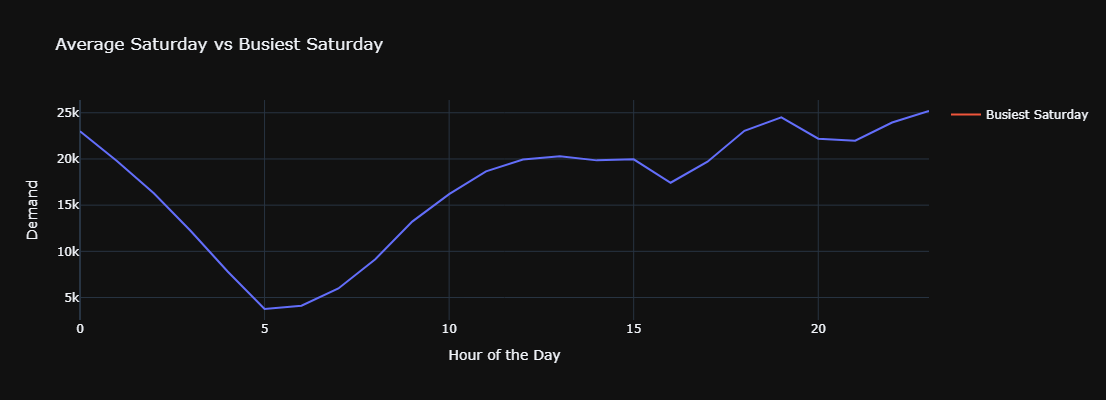

In [34]:
import pandas as pd
import plotly.express as px

# Extracting the values for the busiest Saturday (Jan 31, 2015)
sat_max = df_hourly[(df_hourly['Weekday'] == 'Saturday') & (df_hourly['timestamp'].between('2015-01-31', '2015-01-31'))]

# Computing the average demand for each hour on Saturdays
avg_sat = df_hourly[df_hourly['Weekday'] == 'Saturday'].groupby('Hour')['value'].mean().reset_index()

# Plotting both lines using Plotly Express
fig = px.line(avg_sat, x='Hour', y='value', labels={'value': 'Demand'}, title="Average Saturday vs Busiest Saturday",
              line_shape='linear')
fig.add_scatter(x=sat_max['Hour'], y=sat_max['value'], mode='lines', name='Busiest Saturday')

# Updating layout for better visualization
fig.update_layout(width=800, height=400, xaxis_title="Hour of the Day", yaxis_title="Demand", template="plotly_dark")

# Show plot
fig.show()


#### 📊 **In-Depth Analysis of the "Average Saturday vs Busiest Saturday" Plot**  

This plot compares the **average demand on a typical Saturday** with the **demand on the busiest Saturday** (January 31, 2015). Let’s break it down step by step for an easy understanding.  

---

##### **1. Understanding the Two Lines in the Plot**
🔹 **Blue Line (Average Saturday)** → Represents the **average demand** for each hour across multiple Saturdays.  
🔹 **Red Line (Busiest Saturday)** → Shows the **actual demand** on the **busiest Saturday** (January 31, 2015).  

By comparing these two lines, we can see whether demand on this particular Saturday was significantly higher than usual.  

---

#### **2. How Demand Changes Throughout the Day**
##### **(A) Demand is Highest at Midnight (00:00 - 01:00)**
- The plot starts with a **high demand (above 25k)** at midnight.  
- This could be due to **late-night activity**, like people returning from events, working late shifts, or entertainment (movies, clubs, etc.).  

##### **(B) Sharp Drop Between 1 AM - 5 AM**
- After midnight, the demand **drops quickly**, reaching its lowest point around **5 AM** (near 5k).  
- This makes sense because most people are **asleep during these hours**, leading to **very low activity**.

##### **(C) Steady Increase from 6 AM - 10 AM**
- Around **6 AM**, demand starts **rising steadily** as people **wake up and start their day**.
- This could be due to:
  ✅ Morning commuters  
  ✅ Shops & businesses opening  
  ✅ People going out for breakfast, exercise, or work  

##### **(D) Stable Demand Between 10 AM - 3 PM**
- From **10 AM to 3 PM**, demand remains **relatively stable**.
- This could be because:
  ✅ People are at work or busy with weekend activities.  
  ✅ Lunch hours also contribute to moderate demand.  

##### **(E) Afternoon Drop (Around 3 PM - 4 PM)**
- A **small dip** occurs in demand, likely due to **midday breaks** when people slow down before the evening rush.

##### **(F) Rapid Rise in the Evening (After 5 PM)**
- **From 5 PM onwards, demand starts rising quickly again.**  
- This is because:
  ✅ People leave work and start their evening activities.  
  ✅ More people go shopping, dining, or socializing.  

##### **(G) High Demand at Night (After 8 PM)**
- The demand stays **very high** in the late evening, peaking **between 8 PM - 10 PM**.  
- This could be because:
  ✅ People are out for dinner or entertainment.  
  ✅ More transport, deliveries, and services are active.  

---

#### **3. Why Compare "Busiest Saturday" to "Average Saturday"?**
We are **comparing the busiest Saturday with the average Saturday** to find unusual patterns in demand.  

🚀 **If the red line (busiest Saturday) is much higher than the blue line, it means:**
- A special event or holiday might have **increased demand**.
- More people might have been **traveling, shopping, or using services** than usual.  

🔻 **If the lines are close together, it means:**
- Demand on that Saturday was **not very different from a typical Saturday**.  

**👉 The biggest takeaway here is that weekends tend to have higher demand, and special Saturdays can have even more extreme demand spikes.**  

---

#### **4. Key Takeaways & Business Insights**
🔍 **What We Learned from the Graph:**
✅ **Peak demand happens late at night (midnight) and in the evening (8 PM - 10 PM).**  
✅ **Demand is lowest between 3 AM - 5 AM.**  
✅ **Busiest Saturdays might indicate special events or holidays.**  

📌 **For Businesses & Services, This Data Can Be Used For:**
- **Better staffing and resource management** (e.g., hire more staff in the evening).  
- **Optimizing transport and delivery schedules** (since demand fluctuates).  
- **Promotional campaigns** (run ads or offers during peak hours).  

---

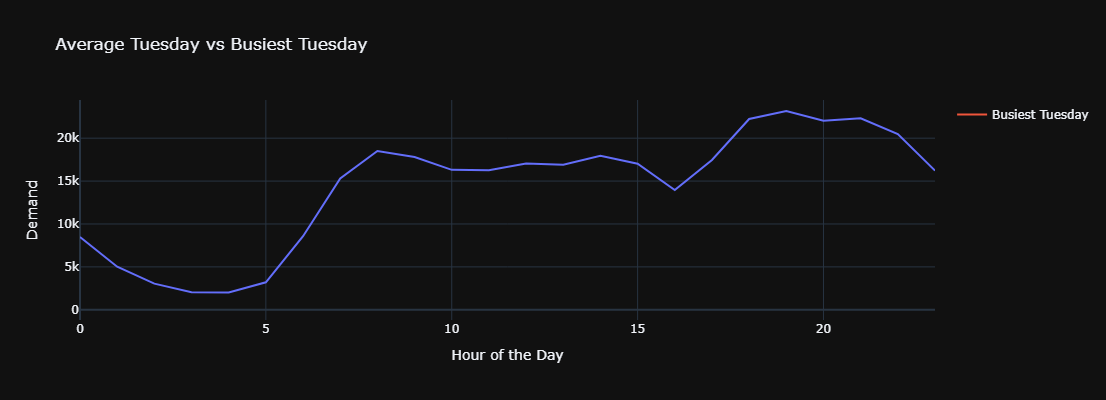

In [35]:
import pandas as pd
import plotly.express as px

# Extracting the values for the busiest Tuesday
tues_max = df_hourly[(df_hourly['Weekday'] == 'Tuesday') & 
                     (df_hourly['timestamp'].between('2015-01-27', '2015-01-27'))]  # Pick a known Tuesday

# Computing the average demand for each hour on Tuesdays
avg_tues = df_hourly[df_hourly['Weekday'] == 'Tuesday'].groupby('Hour')['value'].mean().reset_index()

# Plotting both lines using Plotly Express
fig = px.line(avg_tues, x='Hour', y='value', labels={'value': 'Demand'}, 
              title="Average Tuesday vs Busiest Tuesday", line_shape='linear')

fig.add_scatter(x=tues_max['Hour'], y=tues_max['value'], mode='lines', name='Busiest Tuesday')

# Updating layout for better visualization
fig.update_layout(width=800, height=400, xaxis_title="Hour of the Day", 
                  yaxis_title="Demand", template="plotly_dark")

# Show plot
fig.show()


#### **🔍 Observations from the "Average Tuesday vs Busiest Tuesday" Plot**  

1. **Morning Drop (0-5 AM):**  
   - The demand starts relatively high but **declines steeply** from midnight to around **5 AM**.  
   - This indicates that **late-night demand is decreasing** rapidly, likely due to fewer activities or reduced business operations.

2. **Morning Surge (5-9 AM):**  
   - **A sharp rise in demand** is seen after **5 AM**, peaking around **9-10 AM**.  
   - This aligns with **morning commuting hours** or business opening times.  
   - **The busiest Tuesday follows a similar trend** but has slightly higher peaks.

3. **Midday Stability (10 AM - 4 PM):**  
   - Demand remains **relatively stable** between **10 AM and 4 PM**, with minor fluctuations.  
   - This suggests **consistent activity throughout business hours**.

4. **Evening Spike (5-9 PM):**  
   - A second **notable peak** occurs in the **evening hours** (around **6-9 PM**).  
   - This could be due to **commuting hours**, increased consumer activity, or business closings.  
   - The busiest Tuesday has a slightly **higher** evening peak than the average.

5. **Night Decline (After 9 PM):**  
   - After **9 PM**, demand **gradually drops**, following the usual end-of-day pattern.  
   - The decline is less steep than in the morning, indicating a slower transition into nighttime activity.

---

#### **📊 In-Depth Comparative Analysis: Saturday vs. Tuesday Demand Trends**  

To better understand the differences between **Tuesday (Weekday) and Saturday (Weekend) trends**, we will break down their behavior across different time intervals and explore potential reasons behind these trends.  

---  

#### **🕛 Midnight to Early Morning (12 AM - 5 AM)**  

| Time Interval  | **Tuesday (Weekday)** | **Saturday (Weekend)** |
|--------------|----------------------|----------------------|
| **Trend**   | Rapid decline in demand | Gradual decline in demand |
| **Key Insights**  | - Demand falls sharply from 12 AM to 5 AM.<br> - People go to bed early due to work/school the next day. | - Demand also drops but at a **slower rate**.<br> - Social activities, late-night events, and weekend relaxation keep demand **higher than Tuesday**. |
| **Possible Causes**  | - Limited late-night activities. <br>- Most businesses close early. | - Nightlife, social gatherings, and weekend activities contribute to slower decline. |
| **Conclusion**  | **Tuesdays have an early shutdown in activity, whereas Saturdays experience more late-night engagement.** |

---

#### **🌅 Early Morning to Noon (5 AM - 12 PM)**  

| Time Interval  | **Tuesday (Weekday)** | **Saturday (Weekend)** |
|--------------|----------------------|----------------------|
| **Trend**   | Sharp rise from 5 AM onward | Gradual rise, later peak |
| **Key Insights**  | - **Morning peak starts early** (around 7-10 AM).<br> - Driven by **commuting hours, school schedules, and business openings**. | - **Later rise in activity** compared to Tuesday.<br> - People wake up later, **morning rush is less intense**. |
| **Possible Causes**  | - Work & school schedules create **structured morning demand**.<br> - Businesses and offices start early. | - No fixed schedule leads to **delayed morning activity**.<br> - Leisure and brunch culture extend the morning timeline. |
| **Conclusion**  | **Tuesday sees an early, structured peak, while Saturday’s morning demand rises slowly and peaks later.** |

---

#### **🌆 Afternoon to Early Evening (12 PM - 6 PM)**  

| Time Interval  | **Tuesday (Weekday)** | **Saturday (Weekend)** |
|--------------|----------------------|----------------------|
| **Trend**   | Demand stabilizes | Demand remains dynamic |
| **Key Insights**  | - A **flat trend from 12 PM to 6 PM**.<br> - This suggests steady work/business operations. | - Demand **continues to fluctuate**, indicating more diverse activities. |
| **Possible Causes**  | - People are engaged in work, reducing movement.<br> - Limited fluctuations since most are at their offices. | - More shopping, entertainment, and outdoor activities.<br> - Some people work weekends, but **flexibility leads to varied demand**. |
| **Conclusion**  | **Tuesday shows a stable demand trend, while Saturday remains more dynamic due to flexible weekend plans.** |

---

#### **🌃 Evening to Late Night (6 PM - 12 AM)**  

| Time Interval  | **Tuesday (Weekday)** | **Saturday (Weekend)** |
|--------------|----------------------|----------------------|
| **Trend**   | Second peak at 6-9 PM, then decline | Extended peak till midnight |
| **Key Insights**  | - A second **peak occurs in the evening**, but **drops quickly after 9 PM**. | - Saturday **demand stays high for longer**, reflecting nightlife and entertainment. |
| **Possible Causes**  | - Evening commute from work back home.<br> - People prefer staying home after dinner. | - Social outings, dining, and entertainment keep demand high.<br> - **People stay out later** compared to Tuesday. |
| **Conclusion**  | **Saturday’s evening demand extends longer, while Tuesday’s demand drops early due to work schedules.** |

---

#### **📊 Overall Comparison: Weekday vs. Weekend Activity Patterns**  

| **Time Period**  | **Tuesday (Weekday)** | **Saturday (Weekend)** | **Key Differences** |
|----------------|----------------------|----------------------|-------------------|
| **12 AM - 5 AM** | **Fast decline** in demand | **Slow decline**, more late-night activity | **Weekend nightlife keeps demand higher**. |
| **5 AM - 12 PM** | **Early peak (7-10 AM)** | **Later peak (10-12 PM)** | **Tuesday has a structured morning, while Saturday is more flexible**. |
| **12 PM - 6 PM** | **Stable demand** | **Fluctuating demand** | **Saturday is more dynamic** due to different activities. |
| **6 PM - 12 AM** | **Evening peak at 6-9 PM, then decline** | **Sustained peak until midnight** | **Saturday night activity remains high longer**. |

---

#### **📌 Final Takeaways and Insights**  

1️⃣ **Work vs. Leisure Pattern:**  
   - **Tuesday demand is structured around work and school schedules.**  
   - **Saturday demand is more flexible, lasting throughout the day and evening.**  

2️⃣ **Morning Behavior:**  
   - **Tuesday has a strong morning rush due to fixed work schedules.**  
   - **Saturday’s morning rise is slower, reflecting a relaxed start.**  

3️⃣ **Evening & Late Night Differences:**  
   - **Tuesday’s evening demand drops after 9 PM as people prepare for work.**  
   - **Saturday sustains high activity, driven by entertainment and nightlife.**  

4️⃣ **Business & Service Implications:**  
   - **Businesses should expect peak-hour demand on weekdays.**  
   - **Weekend services must handle sustained activity over longer hours.**  

### Models

In [36]:
df_hourly.dropna(inplace=True)

In [37]:
df_daily

,timestamp,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average
1,2014-07-02,15284.166667,Wednesday,0,2,7,2014,2,15540.979167,15412.572917,15137.875672
2,2014-07-03,14794.625000,Thursday,0,3,7,2014,3,15284.166667,15206.590278,15343.679435
3,2014-07-04,11511.770833,Friday,0,4,7,2014,4,14794.625000,14282.885417,15983.970430
4,2014-07-05,11572.291667,Saturday,0,5,7,2014,5,11511.770833,13740.766667,17007.264785
5,2014-07-06,11464.270833,Sunday,0,6,7,2014,6,11572.291667,13361.350694,14749.539583
...,...,...,...,...,...,...,...,...,...,...,...
210,2015-01-27,4834.541667,Tuesday,0,1,1,2015,27,7818.979167,12874.401786,14267.705556
211,2015-01-28,12947.562500,Wednesday,0,2,1,2015,28,4834.541667,12628.976190,15137.875672
212,2015-01-29,14686.145833,Thursday,0,3,1,2015,29,12947.562500,12526.473214,15343.679435
213,2015-01-30,16676.625000,Friday,0,4,1,2015,30,14686.145833,12580.431548,15983.970430


In [38]:
df_hourly

,timestamp,value,Hour,Weekday,value_Average
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065
...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,24501.870968
5156,2015-01-31 20:00:00,24138.0,20,Saturday,22193.758065
5157,2015-01-31 21:00:00,24194.5,21,Saturday,21983.241935
5158,2015-01-31 22:00:00,26515.0,22,Saturday,23949.951613


#### 1️⃣ Contamination-Based Approach
This method first sets contamination="auto", then recalculates contamination manually.

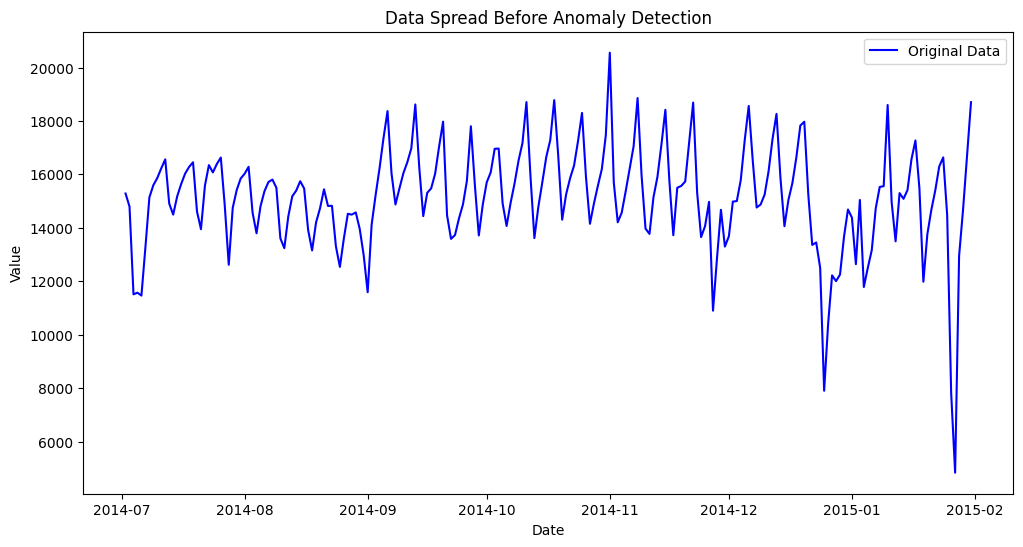

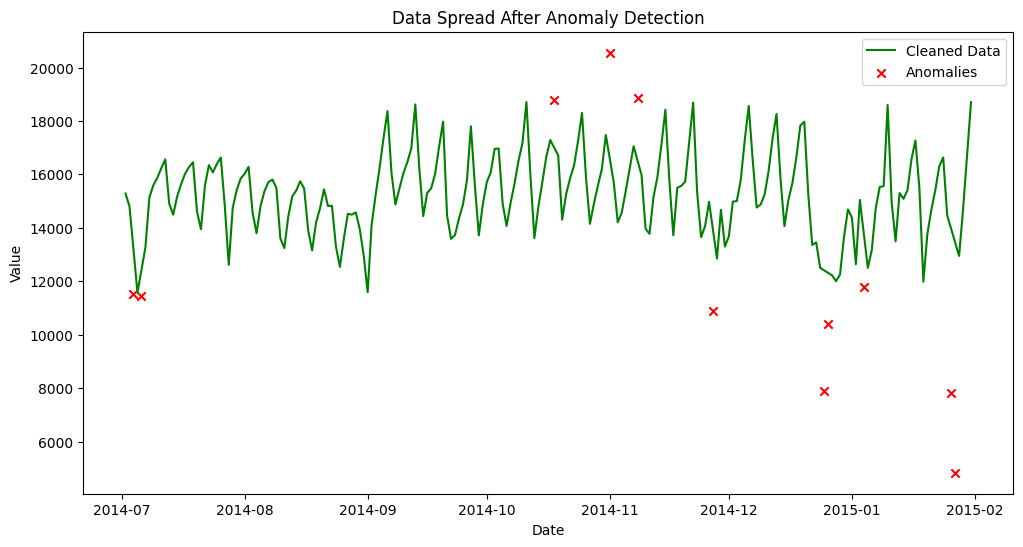

Detected Anomalies:
     timestamp         value
3   2014-07-04  11511.770833
5   2014-07-06  11464.270833
109 2014-10-18  18778.958333
123 2014-11-01  20553.500000
130 2014-11-08  18857.333333
149 2014-11-27  10899.666667
177 2014-12-25   7902.125000
178 2014-12-26  10397.958333
187 2015-01-04  11785.604167
209 2015-01-26   7818.979167
210 2015-01-27   4834.541667


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Assuming df_daily is already loaded

# Convert timestamp to datetime format
df_daily['timestamp'] = pd.to_datetime(df_daily['timestamp'])

# Visualizing the data before anomaly detection
plt.figure(figsize=(12, 6))
plt.plot(df_daily['timestamp'], df_daily['value'], label='Original Data', color='blue')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Data Spread Before Anomaly Detection')
plt.legend()
plt.show()

# Applying Isolation Forest for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df_daily['anomaly'] = iso_forest.fit_predict(df_daily[['value']])

# Filtering out anomalies
anomalies = df_daily[df_daily['anomaly'] == -1]
cleaned_data = df_daily[df_daily['anomaly'] == 1]

# Visualizing data after anomaly removal
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['timestamp'], cleaned_data['value'], label='Cleaned Data', color='green')
plt.scatter(anomalies['timestamp'], anomalies['value'], color='red', label='Anomalies', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Data Spread After Anomaly Detection')
plt.legend()
plt.show()

# Displaying detected anomalies
print("Detected Anomalies:")
print(anomalies[['timestamp', 'value']])


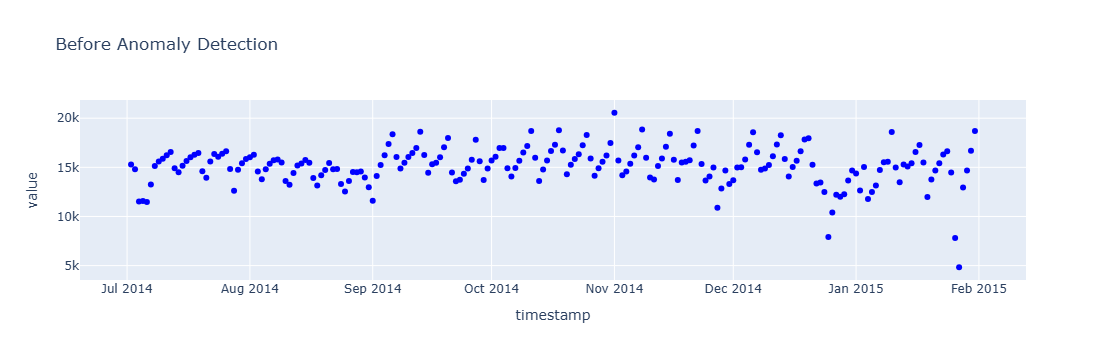

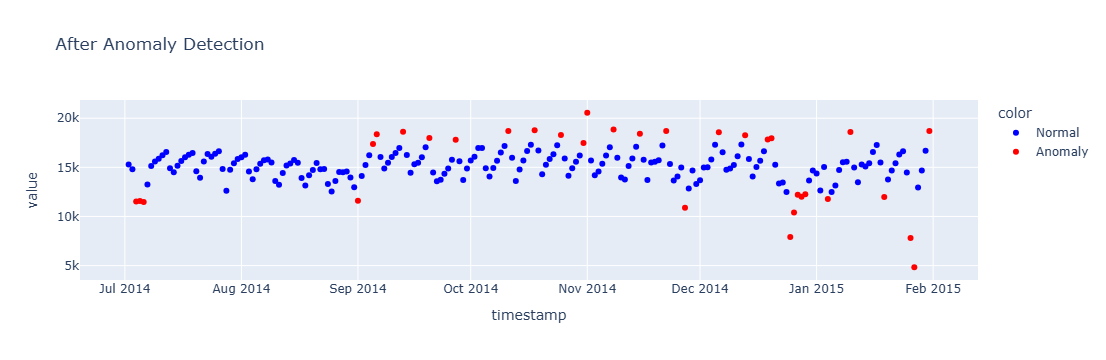

In [45]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest with auto contamination
iso_forest = IsolationForest(contamination="auto", random_state=42)
df_daily['anomaly'] = iso_forest.fit_predict(df_daily[['value']])

# Compute manual contamination rate
contamination_rate = (df_daily['anomaly'] == -1).sum() / len(df_daily)

# Refit with calculated contamination rate
iso_forest = IsolationForest(contamination=contamination_rate, random_state=42)
df_daily['anomaly'] = iso_forest.fit_predict(df_daily[['value']])

# Visualizing data before anomaly detection
fig_before = px.scatter(df_daily, x="timestamp", y="value", title="Before Anomaly Detection", color_discrete_sequence=["blue"])
fig_before.show()

# Visualizing data after anomaly detection
fig_after = px.scatter(df_daily, x="timestamp", y="value", color=df_daily["anomaly"].map({1: "Normal", -1: "Anomaly"}),
                       title="After Anomaly Detection", color_discrete_map={"Normal": "blue", "Anomaly": "red"})
fig_after.show()


In [46]:
df_daily

,timestamp,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average,anomaly
1,2014-07-02,15284.166667,Wednesday,0,2,7,2014,2,15540.979167,15412.572917,15137.875672,1
2,2014-07-03,14794.625000,Thursday,0,3,7,2014,3,15284.166667,15206.590278,15343.679435,1
3,2014-07-04,11511.770833,Friday,0,4,7,2014,4,14794.625000,14282.885417,15983.970430,-1
4,2014-07-05,11572.291667,Saturday,0,5,7,2014,5,11511.770833,13740.766667,17007.264785,-1
5,2014-07-06,11464.270833,Sunday,0,6,7,2014,6,11572.291667,13361.350694,14749.539583,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
210,2015-01-27,4834.541667,Tuesday,0,1,1,2015,27,7818.979167,12874.401786,14267.705556,-1
211,2015-01-28,12947.562500,Wednesday,0,2,1,2015,28,4834.541667,12628.976190,15137.875672,1
212,2015-01-29,14686.145833,Thursday,0,3,1,2015,29,12947.562500,12526.473214,15343.679435,1
213,2015-01-30,16676.625000,Friday,0,4,1,2015,30,14686.145833,12580.431548,15983.970430,1


#### 2️⃣ Decision Boundary Approach
This method uses a fixed contamination rate (e.g., 5%) and decision function.

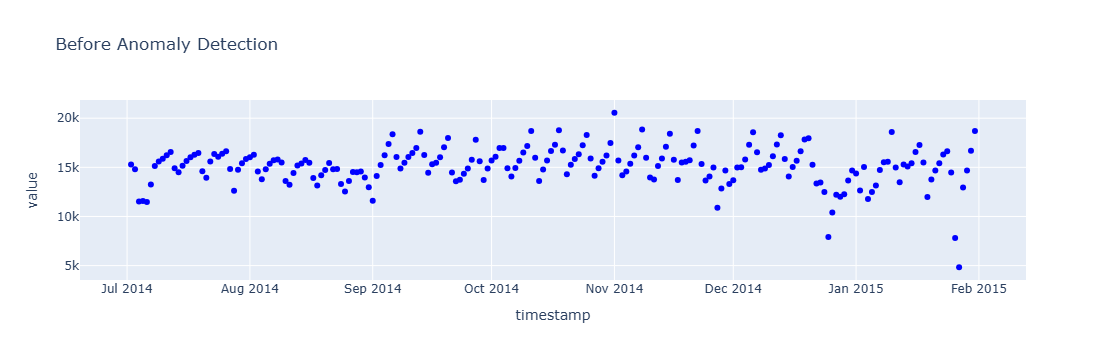

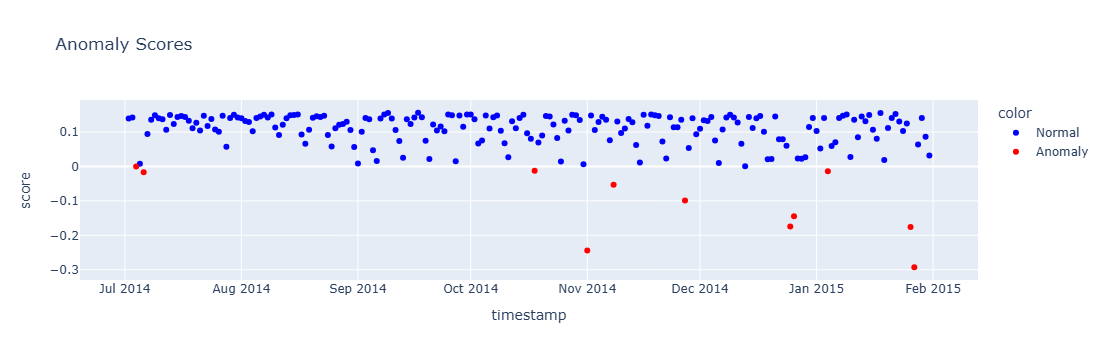

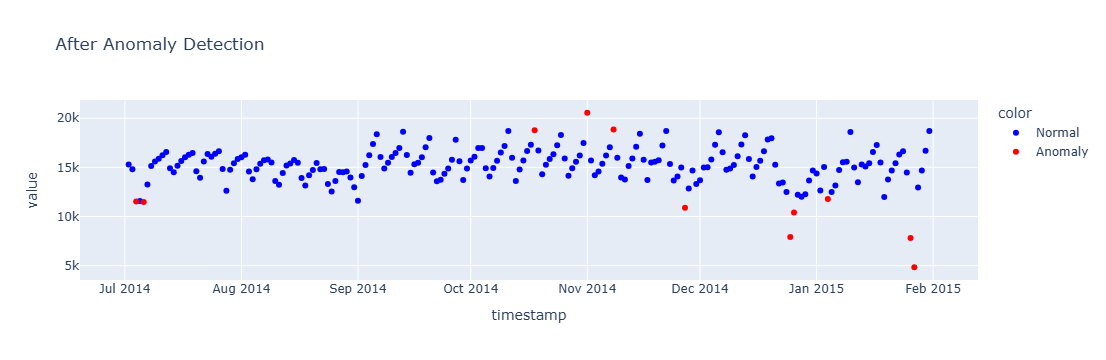

In [49]:
# Apply Isolation Forest with a fixed contamination rate
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_daily["anomaly"] = iso_forest.fit_predict(df_daily[['value']])
df_daily["score"] = iso_forest.decision_function(df_daily[['value']])  # Decision function

# Visualizing data before anomaly detection
fig_before = px.scatter(df_daily, x="timestamp", y="value", title="Before Anomaly Detection", color_discrete_sequence=["blue"])
fig_before.show()

# Visualizing anomalies based on decision function
fig_anomaly = px.scatter(df_daily, x="timestamp", y="score", color=df_daily["anomaly"].map({1: "Normal", -1: "Anomaly"}),
                         title="Anomaly Scores", color_discrete_map={"Normal": "blue", "Anomaly": "red"})
fig_anomaly.show()

# Visualizing data after anomaly detection
fig_after = px.scatter(df_daily, x="timestamp", y="value", color=df_daily["anomaly"].map({1: "Normal", -1: "Anomaly"}),
                       title="After Anomaly Detection", color_discrete_map={"Normal": "blue", "Anomaly": "red"})
fig_after.show()
